### Importing required packages

In [150]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Printing versions of imported packages

In [146]:
{'Pandas':pd.__version__,
'seaborn':sns.__version__,
'matplotlib':plt.__version__,
'sklearn':sklearn.__version__,
'numpy':np.__version__,
'joblib':joblib.__version__}

{'Pandas': '0.23.4',
 'seaborn': '0.9.0',
 'matplotlib': '3.0.2',
 'sklearn': '0.20.1',
 'numpy': '1.17.2',
 'joblib': '0.14.0'}

### Setting up the directory to current working directory

In [148]:
os.chdir(os.getcwd())

### Lets start with Phone a

In [6]:
phone_a_sensor = pd.read_csv('a.sensor.csv')

phone_a_sensor.sort_values(by='timestamp(ms)').head()

,timestamp(ms),acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec)
0,1397019805843,0.0809,-0.2223,0.2055,0.4154,-1.0777,-2.4263,-0.2120,-0.2120,0.3575
1,1397019805942,0.0505,-0.1454,0.0934,0.4797,-1.0745,-2.3135,-0.0847,-0.0847,0.6287
2,1397019806040,0.1952,0.5475,-0.0295,0.5663,-1.0610,-2.1922,-0.2483,-0.2483,0.4558
3,1397019806139,-0.0578,0.1958,0.0850,0.6059,-1.0666,-2.1255,-0.0796,-0.0796,0.0817
4,1397019806237,0.0800,-0.1689,-0.2530,0.5836,-1.0347,-2.1527,0.6329,0.6329,0.0925


### The sensor data has data related to - 

#### phone's acceleration along x, y and z axis 

#### phone's roll, pitch and yaw angle

#### phone's angular velocity along x, y, and z axis

#### All the data is captured at a latency of around 100 ms

### Lets inspect the labels of phone a

In [8]:
phone_a_label = pd.read_csv('a.lbl.csv')

phone_a_label.sort_values(by='timestamp(ms)').head()

,timestamp(ms),label (0=start 1=end 2=cancel)
0,1397019861612,0
1,1397019866475,1
2,1397019887463,0
3,1397019888154,1
4,1397020224082,0


### Latency of streaming labels is more than that of the sensor data, hence we would have to merge the sensors with the lables using nearest timesatmp at a given tolerance level

In [9]:
phone_a_sensor['timepoint'] = pd.to_datetime(phone_a_sensor['timestamp(ms)'])
phone_a_label['timepoint'] = pd.to_datetime(phone_a_label['timestamp(ms)'])

# converting this to the index so we can preserve the date_start_time columns so you can validate the merging logic
df1 = phone_a_sensor.sort_values('timestamp(ms)')
df2 = phone_a_label.sort_values('timestamp(ms)')

df1.index = phone_a_sensor['timepoint']
df2.index = phone_a_label['timepoint']

tol = pd.Timedelta('0.2 ms')
phone_a = pd.merge_asof(left=df1,right=df2,left_index=True,right_index=True,direction='nearest',tolerance=tol)

In [10]:
phone_a.head()

,timestamp(ms)_x,acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),timepoint_x,timestamp(ms)_y,label (0=start 1=end 2=cancel),timepoint_y
timepoint,,,,,,,,,,,,,,
1970-01-01 00:23:17.019805843,1397019805843,0.0809,-0.2223,0.2055,0.4154,-1.0777,-2.4263,-0.2120,-0.2120,0.3575,1970-01-01 00:23:17.019805843,1.397020e+12,0.0,1970-01-01 00:23:17.019861612
1970-01-01 00:23:17.019805942,1397019805942,0.0505,-0.1454,0.0934,0.4797,-1.0745,-2.3135,-0.0847,-0.0847,0.6287,1970-01-01 00:23:17.019805942,1.397020e+12,0.0,1970-01-01 00:23:17.019861612
1970-01-01 00:23:17.019806040,1397019806040,0.1952,0.5475,-0.0295,0.5663,-1.0610,-2.1922,-0.2483,-0.2483,0.4558,1970-01-01 00:23:17.019806040,1.397020e+12,0.0,1970-01-01 00:23:17.019861612
1970-01-01 00:23:17.019806139,1397019806139,-0.0578,0.1958,0.0850,0.6059,-1.0666,-2.1255,-0.0796,-0.0796,0.0817,1970-01-01 00:23:17.019806139,1.397020e+12,0.0,1970-01-01 00:23:17.019861612
1970-01-01 00:23:17.019806237,1397019806237,0.0800,-0.1689,-0.2530,0.5836,-1.0347,-2.1527,0.6329,0.6329,0.0925,1970-01-01 00:23:17.019806237,1.397020e+12,0.0,1970-01-01 00:23:17.019861612


### Checking the label count for both classes

In [11]:
phone_a.groupby(by='label (0=start 1=end 2=cancel)')['timestamp(ms)_x'].count().reset_index()

,label (0=start 1=end 2=cancel),timestamp(ms)_x
0,0.0,3064
1,1.0,4530


### Lets do some exploratory analysis of streamind sensor data

### Lets first closely look at the association of accelerations along three axes

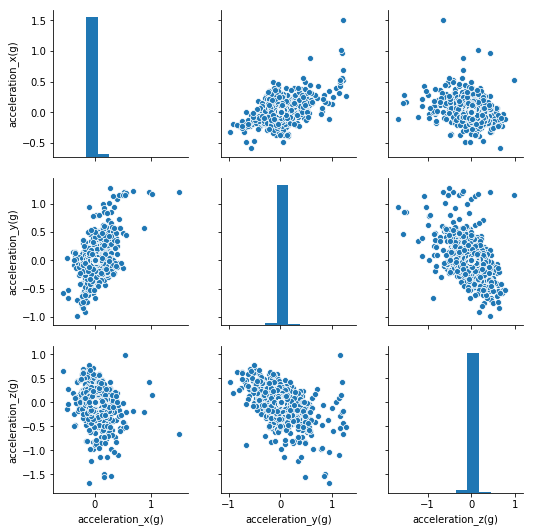

In [197]:
sns.pairplot(phone_a.iloc[:,1:4])

### We see that scatterplots that the accelerations across dimensions are somewhat correlated to each other

### Now, lets look at the association of angular velocities along three directions

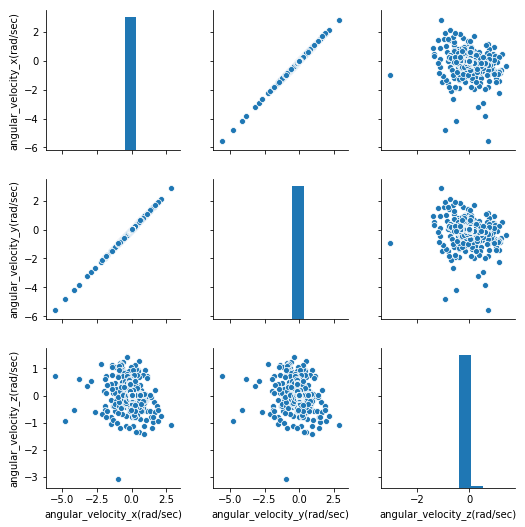

In [113]:
sns.pairplot(phone_a.iloc[:,7:10])

### We see that scatterplots that the accelerations across dimensions are not at all correlated to each other

### Lets also look at all variables w.r.t one another

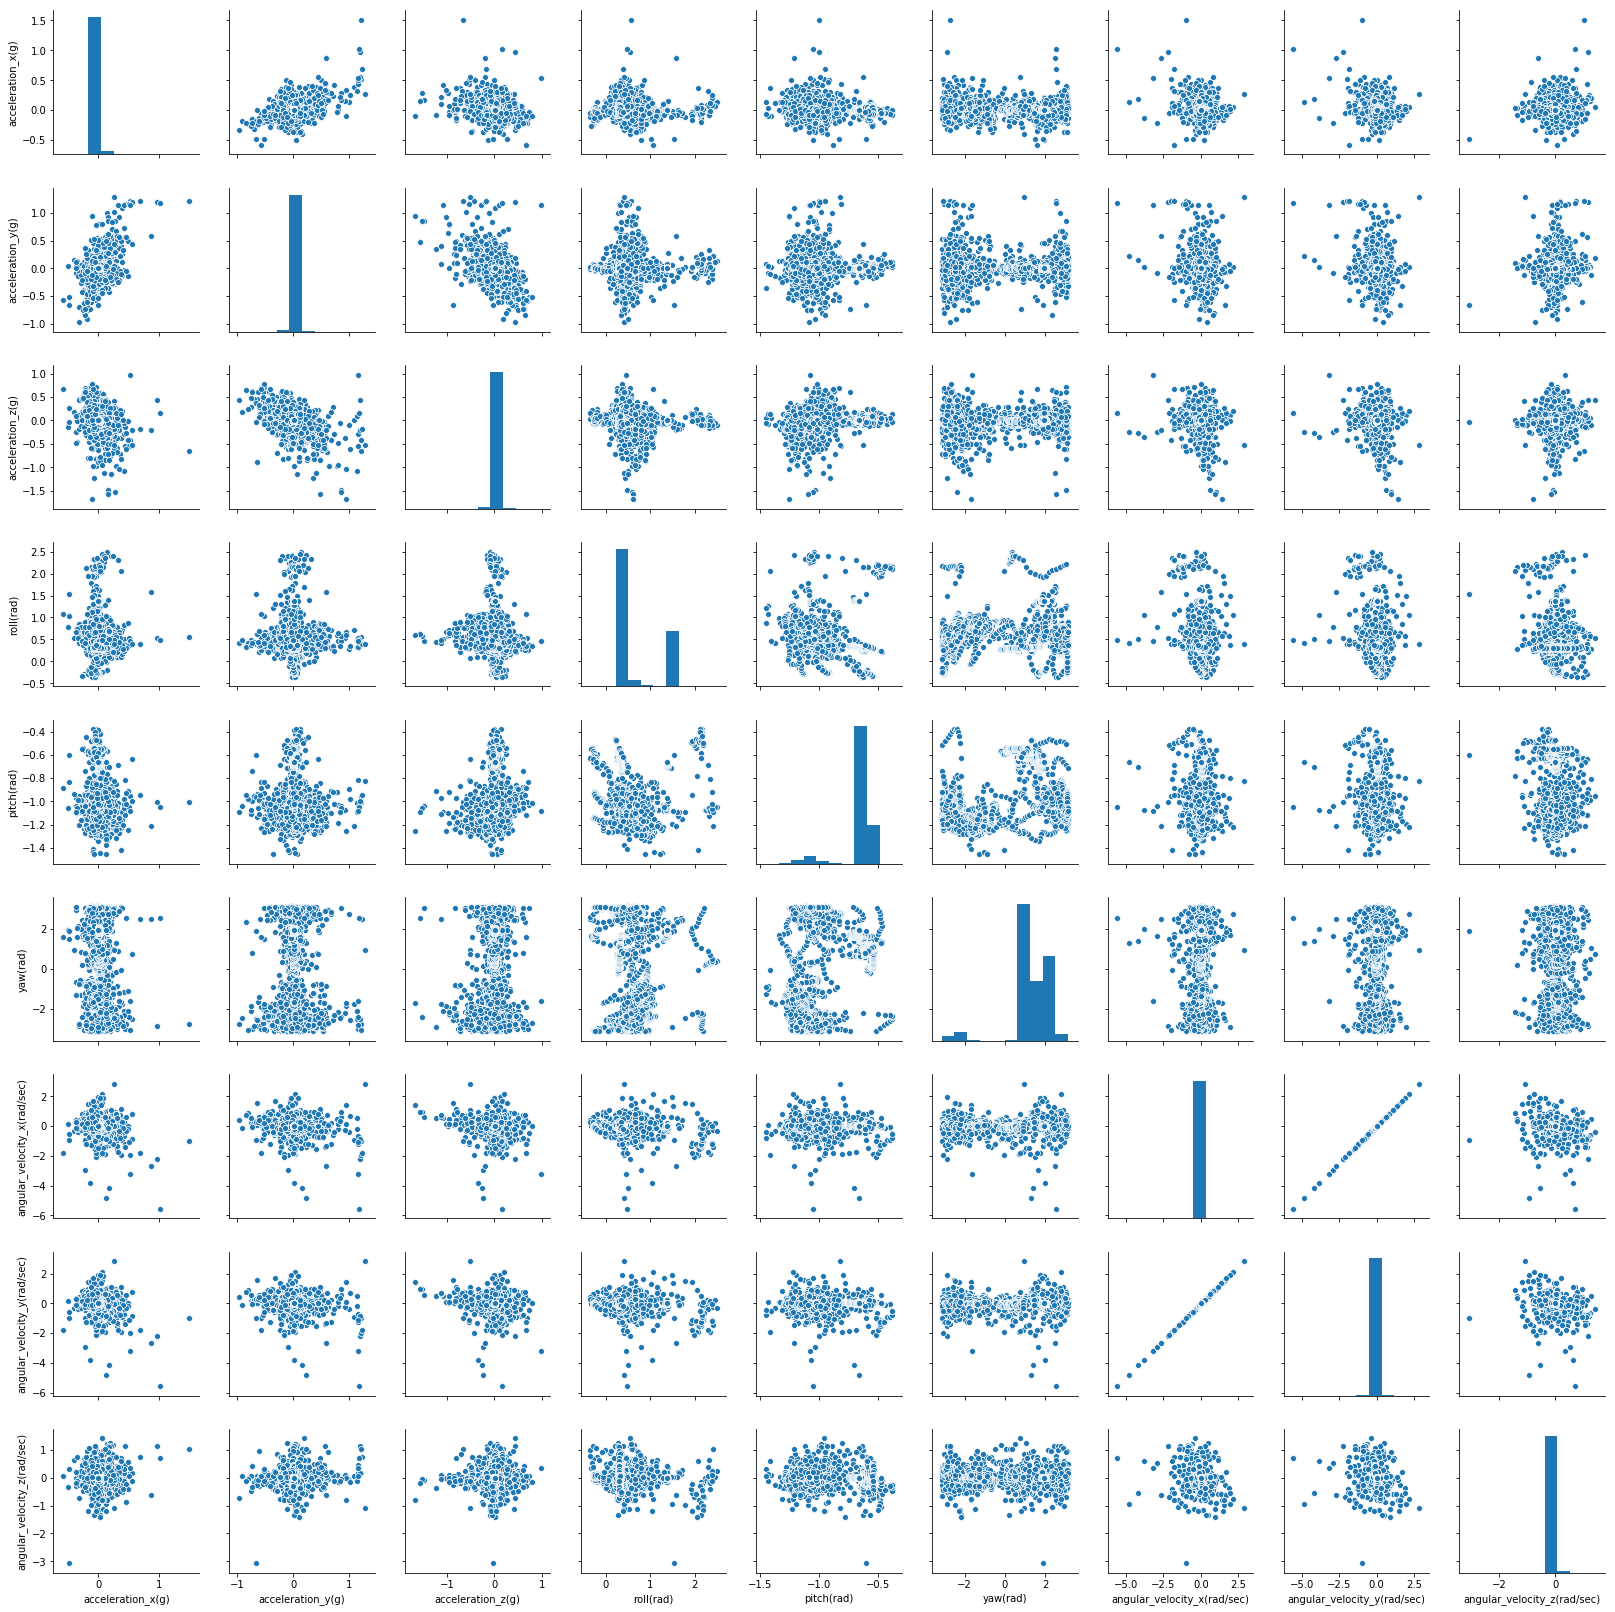

In [133]:
sns.pairplot(phone_a.iloc[:,1:11])

### We see that the yaw angle does a decent job on separating the two classes. The roll angle also hase distinct data points clustered together. This can be validated further by finding feature importance of these variables

### Prepare the train and test data to fit in the classification model

In [125]:
to_drop = ['timestamp(ms)_x','timepoint_x', 'timestamp(ms)_y','timepoint_y']

phone_a_train, phone_a_test = train_test_split(phone_a.drop(to_drop,axis=1).dropna(),random_state = 42)

phone_a_train_input = phone_a_train.iloc[:,0:9]

phone_a_train_label = phone_a_train.iloc[:,-1]

phone_a_test_input = phone_a_test.iloc[:,0:9]

phone_a_test_label = phone_a_test.iloc[:,-1]

In [31]:
def logistic_reg_model(train_data, train_labels, test_data, test_labels):
    from sklearn.linear_model import LogisticRegression as logistic_regression
    model = logistic_regression()
    model.fit(train_data,train_labels)
    predicted_labels = model.predict(test_data)
    acc = accuracy_score(test_labels,predicted_labels)
    prec = precision_score(test_labels,predicted_labels)
    recall = recall_score(test_labels,predicted_labels)
    f1 = f1_score(test_labels,predicted_labels)
    scores = {'Accuracy':round(acc,2),'Precision':round(prec,2),'Recall':round(recall,2),'F1_score':round(f1,2)}
    return scores

In [36]:
logistic_reg_model(phone_a_train_input,phone_a_train_label,phone_a_test_input,phone_a_test_label)

{'Accuracy': 0.81, 'Precision': 0.82, 'Recall': 0.88, 'F1_score': 0.85}

## Note that the scores are test scores

### We tested for precision and recall of the model to control for false positives and false negatives, better the precision and recall, lesser the false negatives and false positives respctively

### Lets run an ensemble model to see if the model fits the data and predicts unseen data better than logistic regression model

In [151]:
def random_forest_model(train_data, train_labels, test_data, test_labels):
    from sklearn.ensemble import RandomForestClassifier as random_forest
    model = random_forest()
    model.fit(train_data,train_labels)
    predicted_labels = model.predict(test_data)
    acc = accuracy_score(test_labels,predicted_labels)
    prec = precision_score(test_labels,predicted_labels)
    recall = recall_score(test_labels,predicted_labels)
    f1 = f1_score(test_labels,predicted_labels)
    scores = {'Accuracy':round(acc,2),'Precision':round(prec,2),'Recall':round(recall,2),'F1_score':round(f1,2)}
    feature_imp = pd.DataFrame(train_data.columns,model.feature_importances_)
    return scores, feature_imp

In [152]:
random_forest_model(phone_a_train_input,phone_a_train_label,phone_a_test_input,phone_a_test_label)

({'Accuracy': 0.87, 'Precision': 0.91, 'Recall': 0.88, 'F1_score': 0.89},
                                     0
 0.063696            acceleration_x(g)
 0.049296            acceleration_y(g)
 0.048442            acceleration_z(g)
 0.133863                    roll(rad)
 0.155255                   pitch(rad)
 0.356907                     yaw(rad)
 0.045464  angular_velocity_x(rad/sec)
 0.060488  angular_velocity_y(rad/sec)
 0.086589  angular_velocity_z(rad/sec))

### We used the same random state (42) so that the data is constant and variation in metrics are not due to change in data

### We see that ensemble model - random forest fits the data more accurately and generate more accurate predictions than logistic regression model. 
### Also, as hypothesized earlier, yaw, pitch and roll angle comes out as important features that explain most of the variance seen in classes

### Now that we know the features of sensor data, lets read, merge and start exploring sensor data from phone m at once

In [68]:
phone_m_sensor = pd.read_csv('m.sensor.csv')

phone_m_label = pd.read_csv('m.lbl.csv')

In [70]:
phone_m_sensor['timepoint'] = pd.to_datetime(phone_m_sensor['timestamp(ms)'])
phone_m_label['timepoint'] = pd.to_datetime(phone_m_label['timestamp(ms)'])

# converting this to the index so we can preserve the date_start_time columns so you can validate the merging logic
df1 = phone_m_sensor.sort_values('timestamp(ms)')
df2 = phone_m_label.sort_values('timestamp(ms)')

phone_m = pd.merge_asof(left=df1,right=df2,left_on='timestamp(ms)',right_on='timestamp(ms)',direction='nearest')

### Checking the label count for both classes

In [78]:
phone_m.head()

,timestamp(ms),acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),timepoint_x,label (0=start 1=end 2=cancel),timepoint_y
0,1396948626717,0.0008,0.0038,-0.0054,-0.0217,0.0018,0.0000,-0.0010,-0.0010,-0.0014,1970-01-01 00:23:16.948626717,0,1970-01-01 00:23:16.949162159
1,1396948626816,0.0025,-0.0047,-0.0093,-0.0216,0.0019,-0.0001,-0.0022,-0.0022,0.0023,1970-01-01 00:23:16.948626816,0,1970-01-01 00:23:16.949162159
2,1396948626915,-0.0001,-0.0004,-0.0074,-0.0208,0.0014,-0.0003,0.0014,0.0014,-0.0026,1970-01-01 00:23:16.948626915,0,1970-01-01 00:23:16.949162159
3,1396948627015,0.0027,-0.0006,-0.0054,-0.0207,0.0012,-0.0004,-0.0010,-0.0010,-0.0001,1970-01-01 00:23:16.948627015,0,1970-01-01 00:23:16.949162159
4,1396949160862,-0.0007,0.0350,0.0069,0.1381,0.2162,-0.0150,0.0885,0.0885,0.0309,1970-01-01 00:23:16.949160862,0,1970-01-01 00:23:16.949162159


In [74]:
phone_m.groupby(by='label (0=start 1=end 2=cancel)')['timestamp(ms)'].count().reset_index()

,label (0=start 1=end 2=cancel),timestamp(ms)
0,0,9607
1,1,11718


### Prepare the train and test data to fit in the classification model

In [80]:
to_drop = ['timestamp(ms)','timepoint_x','timepoint_y']

phone_m_train, phone_m_test = train_test_split(phone_m.drop(to_drop,axis=1).dropna(),random_state = 42)

phone_m_train_input = phone_m_train.iloc[:,0:9]

phone_m_train_label = phone_m_train.iloc[:,-1]

phone_m_test_input = phone_m_test.iloc[:,0:9]

phone_m_test_label = phone_m_test.iloc[:,-1]

### Lets run a logistic regression model to see how the model fits the sendor data of phone m

In [81]:
logistic_reg_model(phone_m_train_input,phone_m_train_label,phone_m_test_input,phone_m_test_label)

{'Accuracy': 0.61, 'Precision': 0.63, 'Recall': 0.74, 'F1_score': 0.68}

In [82]:
random_forest_model(phone_a_train_input,phone_a_train_label,phone_a_test_input,phone_a_test_label)

({'Accuracy': 0.88, 'Precision': 0.92, 'Recall': 0.89, 'F1_score': 0.9},
                                     0
 0.059865            acceleration_x(g)
 0.060754            acceleration_y(g)
 0.049472            acceleration_z(g)
 0.140025                    roll(rad)
 0.150994                   pitch(rad)
 0.364156                     yaw(rad)
 0.047867  angular_velocity_x(rad/sec)
 0.059299  angular_velocity_y(rad/sec)
 0.067568  angular_velocity_z(rad/sec))

### Similarly, lets predict shake gesture for streaming sensor data from phone p

In [83]:
phone_p_sensor = pd.read_csv('p.sensor.csv')

phone_p_label = pd.read_csv('p.lbl.csv')

In [99]:
phone_p_sensor['timepoint'] = pd.to_datetime(phone_p_sensor['timestamp(ms)'])
phone_p_label['timepoint'] = pd.to_datetime(phone_p_label['timestamp(ms)'])

# converting this to the index so we can preserve the date_start_time columns so you can validate the merging logic
df1 = phone_p_sensor.sort_values('timestamp(ms)')
df2 = phone_p_label.sort_values('timestamp(ms)')

df1.index = phone_p_sensor['timepoint']
df2.index = phone_p_label['timepoint']

tol = pd.Timedelta('1.8 ms')
phone_p = pd.merge_asof(left=df1,right=df2,left_index=True,right_index=True,direction='nearest',tolerance=tol)

In [109]:
phone_p.groupby(by='label (0=start 1=end 2=cancel)')['timestamp(ms)_x'].count().reset_index()

,label (0=start 1=end 2=cancel),timestamp(ms)_x
0,0,38584
1,1,32318


In [101]:
to_drop = ['timestamp(ms)_x','timepoint_x', 'timestamp(ms)_y','timepoint_y']

phone_p_train, phone_p_test = train_test_split(phone_p.drop(to_drop,axis=1).dropna(),random_state = 42)

phone_p_train_input = phone_p_train.iloc[:,0:9]

phone_p_train_label = phone_p_train.iloc[:,-1]

phone_p_test_input = phone_p_test.iloc[:,0:9]

phone_p_test_label = phone_p_test.iloc[:,-1]

In [110]:
logistic_reg_model(phone_p_train_input,phone_p_train_label,phone_p_test_input,phone_p_test_label)

{'Accuracy': 0.58, 'Precision': 0.53, 'Recall': 0.61, 'F1_score': 0.57}

In [112]:
random_forest_model(phone_p_train_input,phone_p_train_label,phone_p_test_input,phone_p_test_label)

({'Accuracy': 0.93, 'Precision': 0.93, 'Recall': 0.91, 'F1_score': 0.92},
                                     0
 0.040694            acceleration_x(g)
 0.041990            acceleration_y(g)
 0.037994            acceleration_z(g)
 0.146858                    roll(rad)
 0.249673                   pitch(rad)
 0.394780                     yaw(rad)
 0.025441  angular_velocity_x(rad/sec)
 0.024802  angular_velocity_y(rad/sec)
 0.037769  angular_velocity_z(rad/sec))

### The usual trend that we have seen after modeling the sensor data for all the three phones is that when the data is less as in the case of phone a, the parametric model - logistic regression fits the data good but as the volume of the data increases, so does te complexity and hence, ensemble model - random forest fits the data more accurately and genrate more accurate predictions

### One possible reason for this trend is that as we saw in the scatterplots that the accelerations across dimensions are somewhat correlated to each other. This results in multicollinearity in linear models, wheras tree based models are easily able to handle multicollinearity by splitting the multicollinear features relatively far off from one another

### We also noticed that yaw, pitch and roll angle comes out as important features that explain most of the varinace in classes

### lets try to reduce the false positive and false negatives further by tuning the hyper parameters of random forest classifier

In [122]:
def hyp_param_tuning(train_data, train_labels, test_data, test_labels):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 100],
        'max_features': [5, 9],
        'min_samples_leaf': [3, 5],
        'min_samples_split': [8, 12],
        'n_estimators': [100, 300]
    }
    # base random forest model
    rf = RandomForestClassifier()
    # grid search model 
    model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    acc = accuracy_score(test_labels,predicted_labels)
    prec = precision_score(test_labels,predicted_labels)
    recall = recall_score(test_labels,predicted_labels)
    f1 = f1_score(test_labels,predicted_labels)
    scores = {'Accuracy':round(acc,2),'Precision':round(prec,2),'Recall':round(recall,2),'F1_score':round(f1,2)}
    return scores

In [124]:
hyp_param_tuning(phone_p_train_input,phone_p_train_label,phone_p_test_input,phone_p_test_label)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 10.5min finished


{'Accuracy': 0.94, 'Precision': 0.93, 'Recall': 0.94, 'F1_score': 0.94}

### We see that tuning the hyperparametrs has an effect on the reduction of false positives and false negatives

## Lets save this model for future use

In [128]:
from joblib import dump, load
dump(hyp_param_tuning,'random_forest_tuned.joblib')

['random_forest_tuned.joblib']

In [129]:
load('random_forest_tuned.joblib')

<function __main__.hyp_param_tuning(train_data, train_labels, test_data, test_labels)>